In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from get_dataframes import get_global_df


In [2]:
global_df = get_global_df(results_path="../../../experiments/final_experiments")

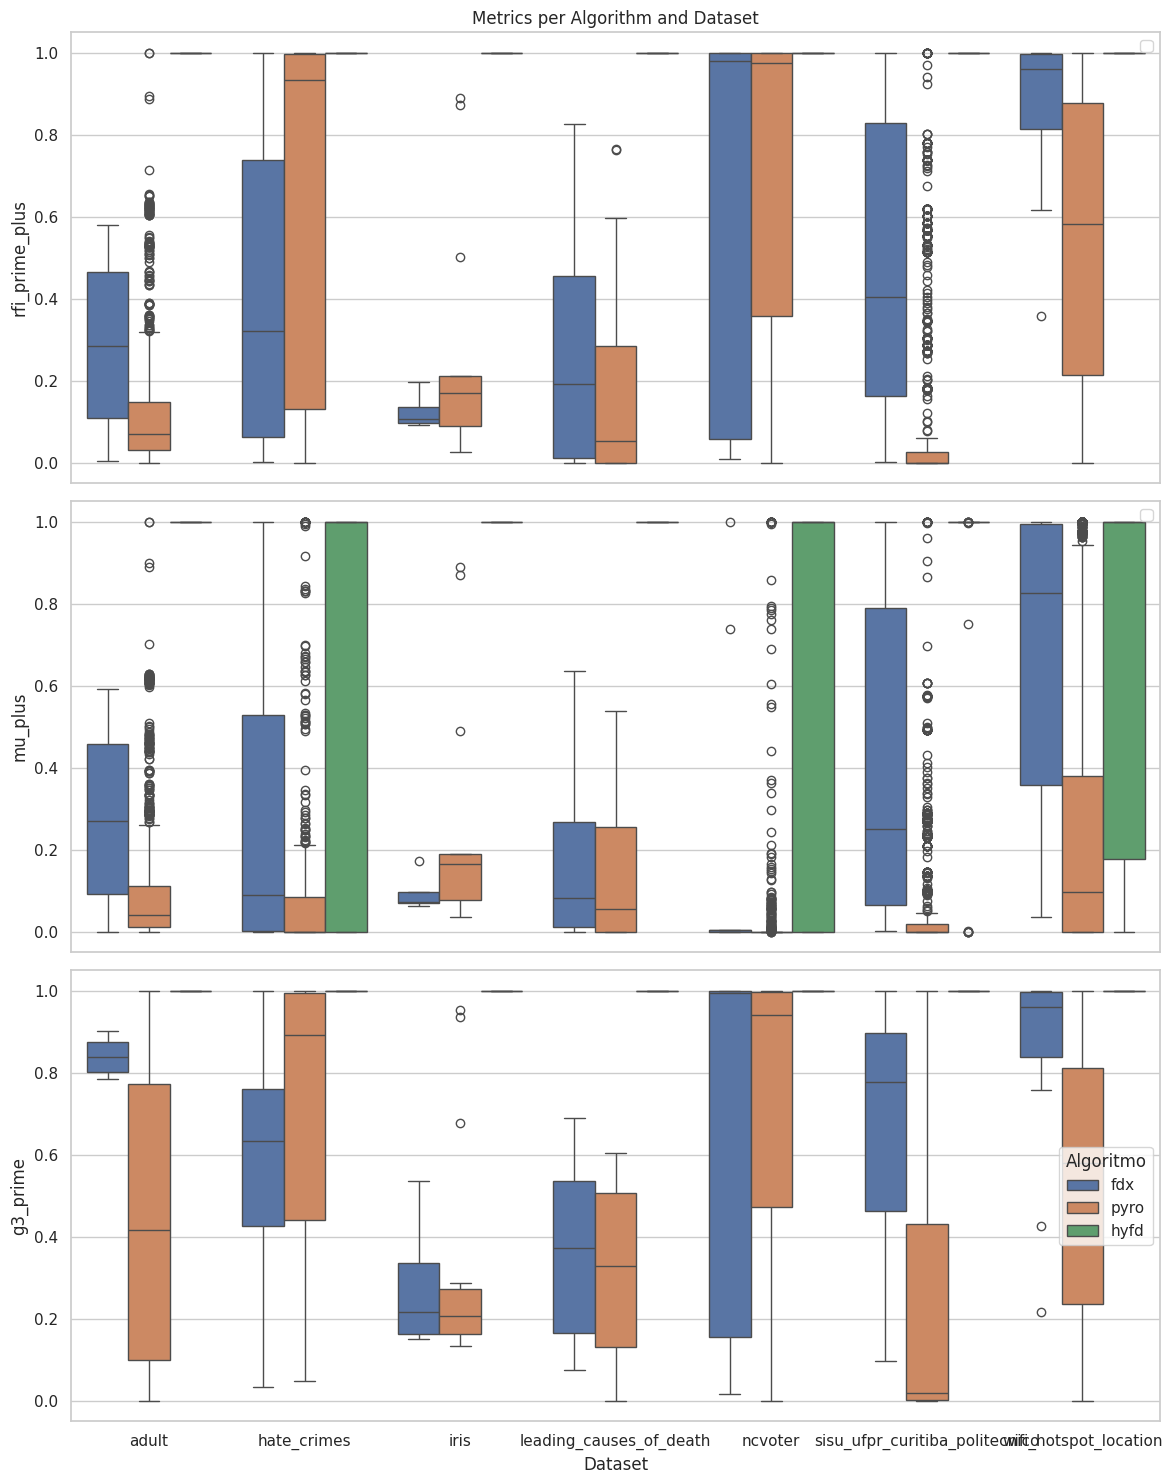

In [3]:
metrics = ["rfi_prime_plus", "mu_plus", "g3_prime"]

sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

for i, metric_name in enumerate(metrics):
    sns.boxplot(
        data=global_df,
        x='dataset',
        y=metric_name,
        hue='algorithm',
        ax=axes[i]
    )
    
    # Set title only for the first plot
    if i == 0:
        axes[i].set_title('Metrics per Algorithm and Dataset')
    
    if i < 2:  # For the first two plots
        axes[i].set_xlabel('')
        axes[i].set_xticklabels([])  # Remove x-tick labels
        axes[i].legend([])

    else:  # For the bottom plot
        axes[i].set_xlabel('Dataset')
        axes[i].legend(title='Algoritmo', loc='center right')

    
    axes[i].set_ylabel(metric_name)


plt.tight_layout()
plt.show()

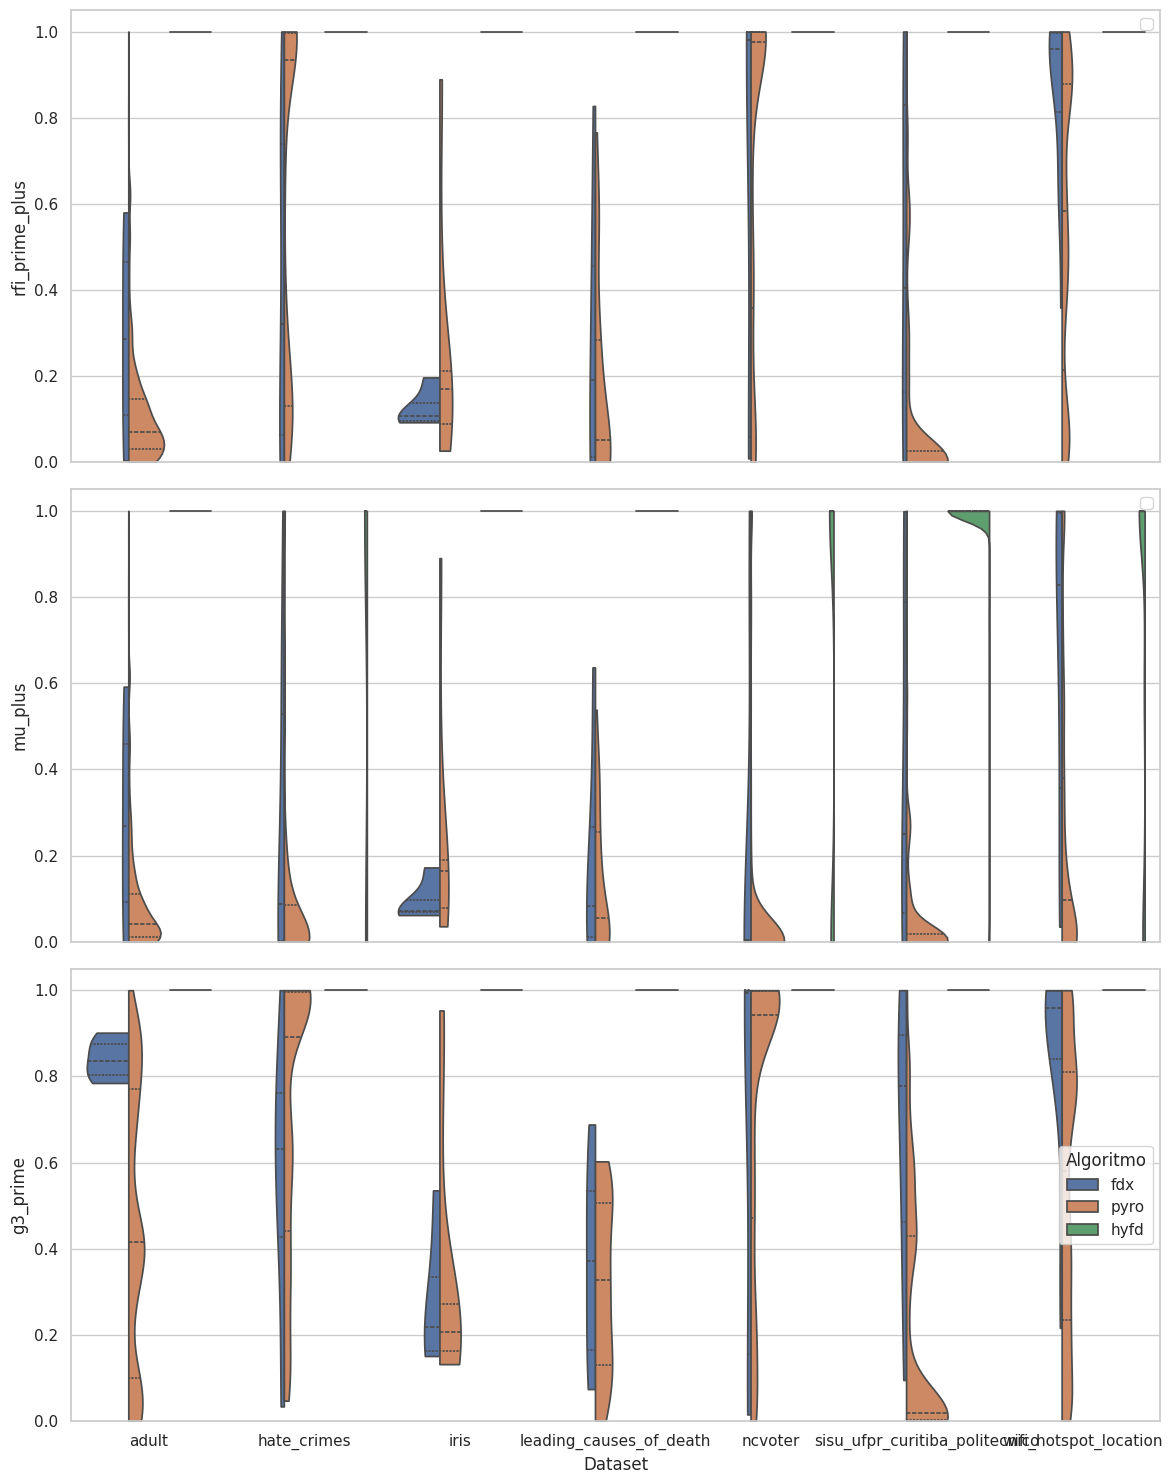

In [4]:

metrics = ["rfi_prime_plus", "mu_plus", "g3_prime"]

sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

for i, metric_name in enumerate(metrics):
    # Replace boxplot with violinplot
    ax = sns.violinplot(
        data=global_df,
        x='dataset',
        y=metric_name,
        hue='algorithm',
        split=True,  # Split the violins for better algorithm comparison
        inner='quartile',  # Show quartiles inside the violin
        ax=axes[i],
        cut=0  # Don't extend the violin past the observed data range
    )
    
    # Set y-axis limits based on actual data range
    min_val = global_df[metric_name].min()
    max_val = global_df[metric_name].max()
    # Add a small buffer (5% of range) for readability
    buffer = (max_val - min_val) * 0.05
    axes[i].set_ylim(max(0, min_val - buffer), max_val + buffer)
    
    # Set appropriate titles and labels
    axes[i].set_ylabel(metric_name)
    axes[i].set_title('')
    
    if i < 2:  # For the first two plots
        axes[i].set_xlabel('')
        axes[i].set_xticklabels([])  # Remove x-tick labels
        axes[i].legend([])

    else:  # For the bottom plot
        axes[i].set_xlabel('Dataset')
        axes[i].legend(title='Algoritmo', loc='center right')

# Adjust spacing between plots
plt.subplots_adjust(hspace=0.1)  # Reduce vertical space between plots

plt.tight_layout()  # No need for rect parameter since we're not making room for external legend
plt.show()


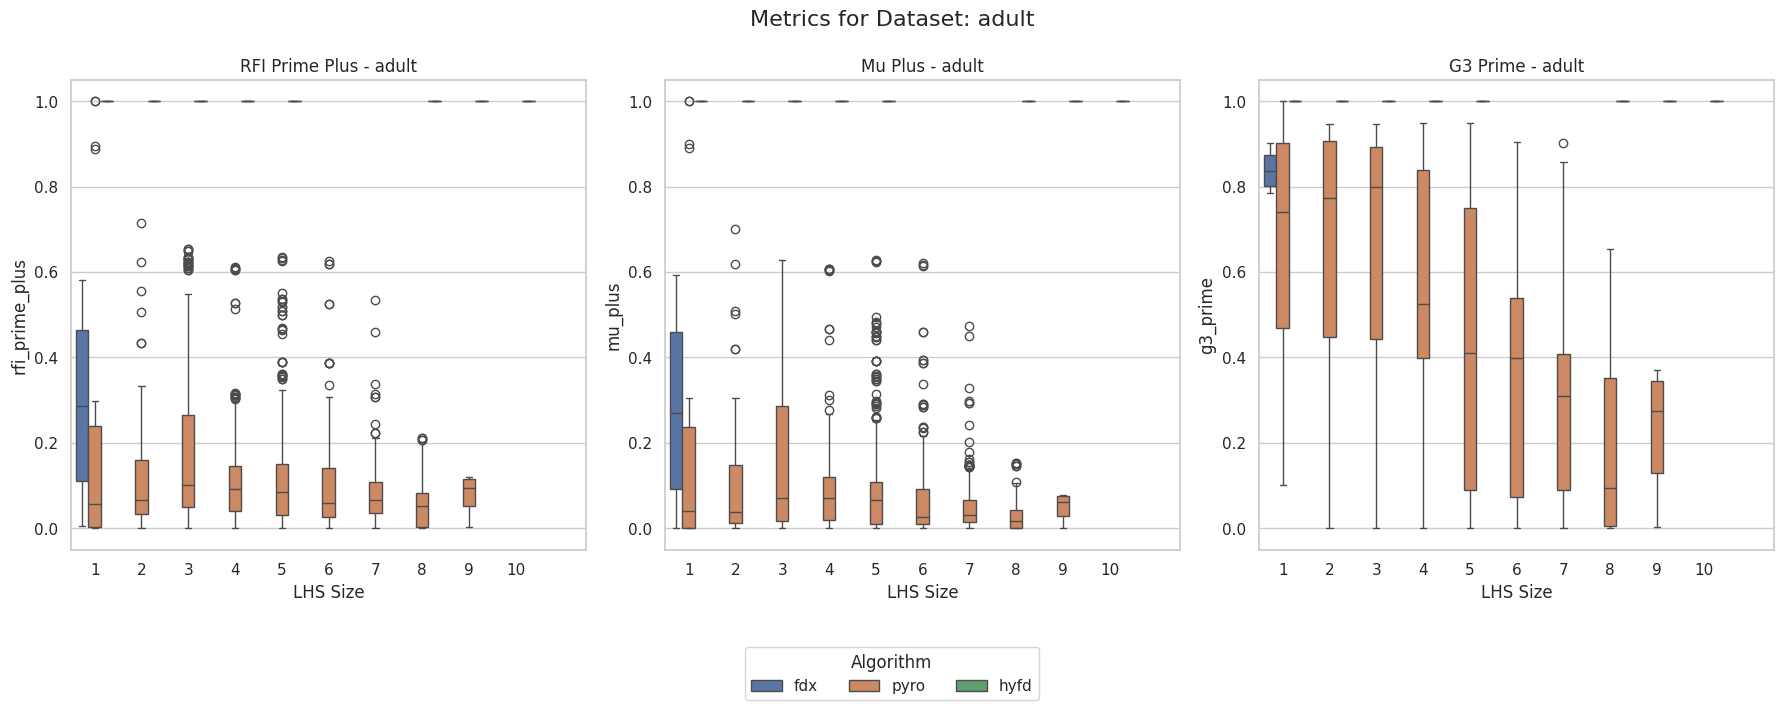

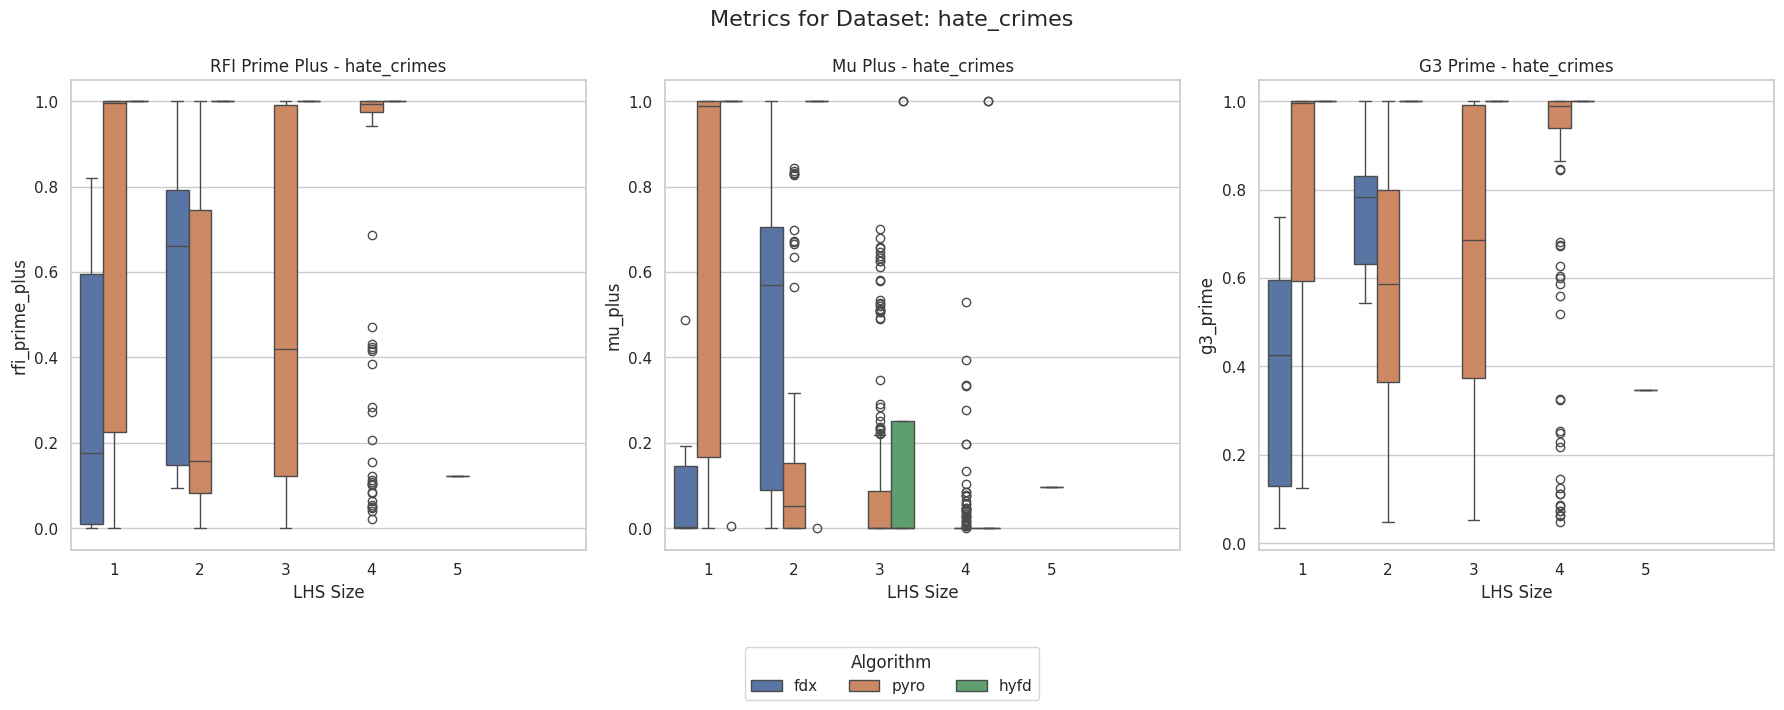

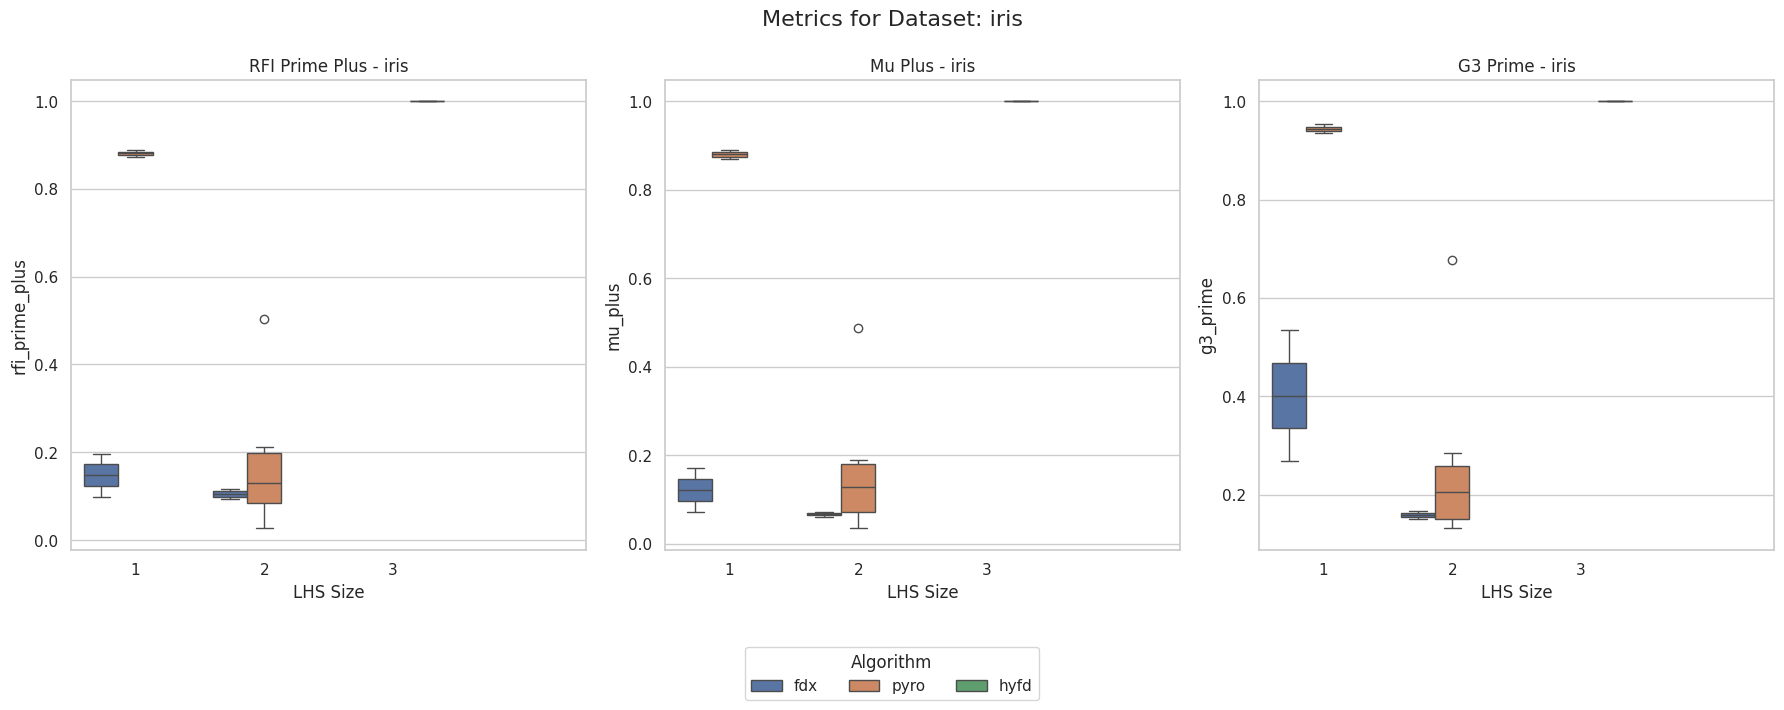

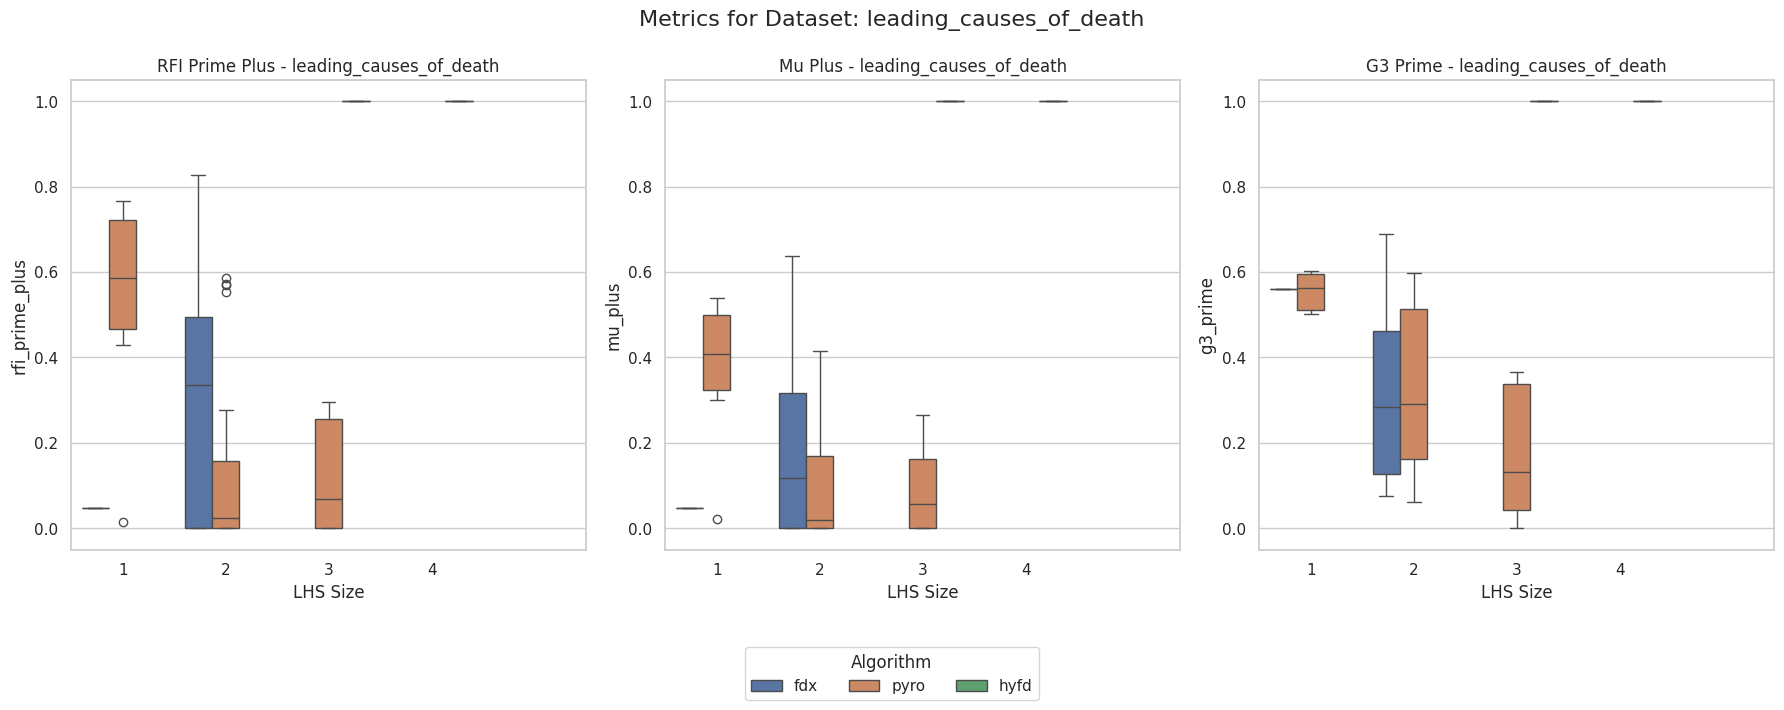

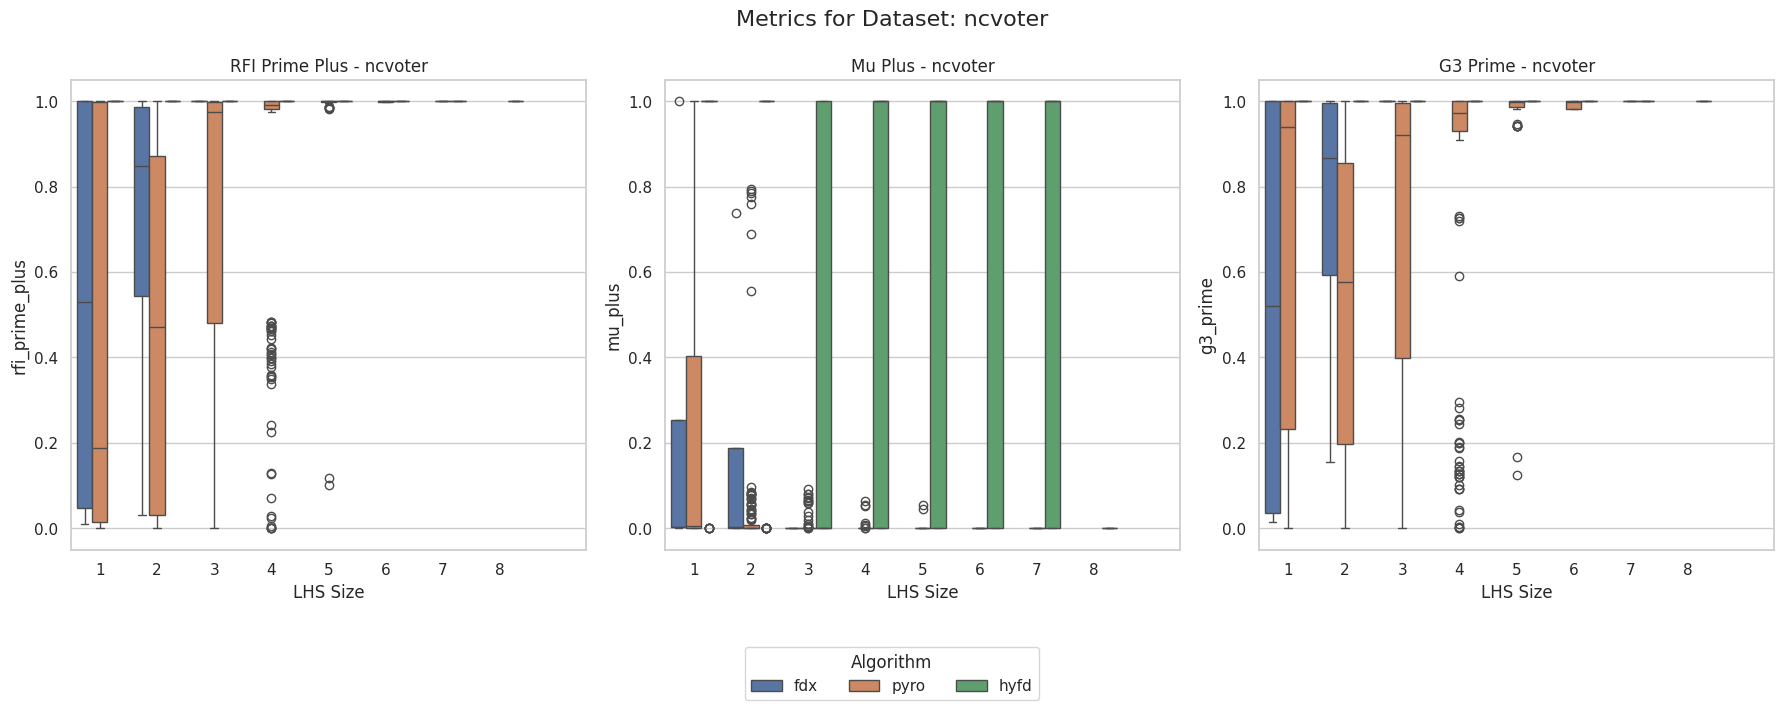

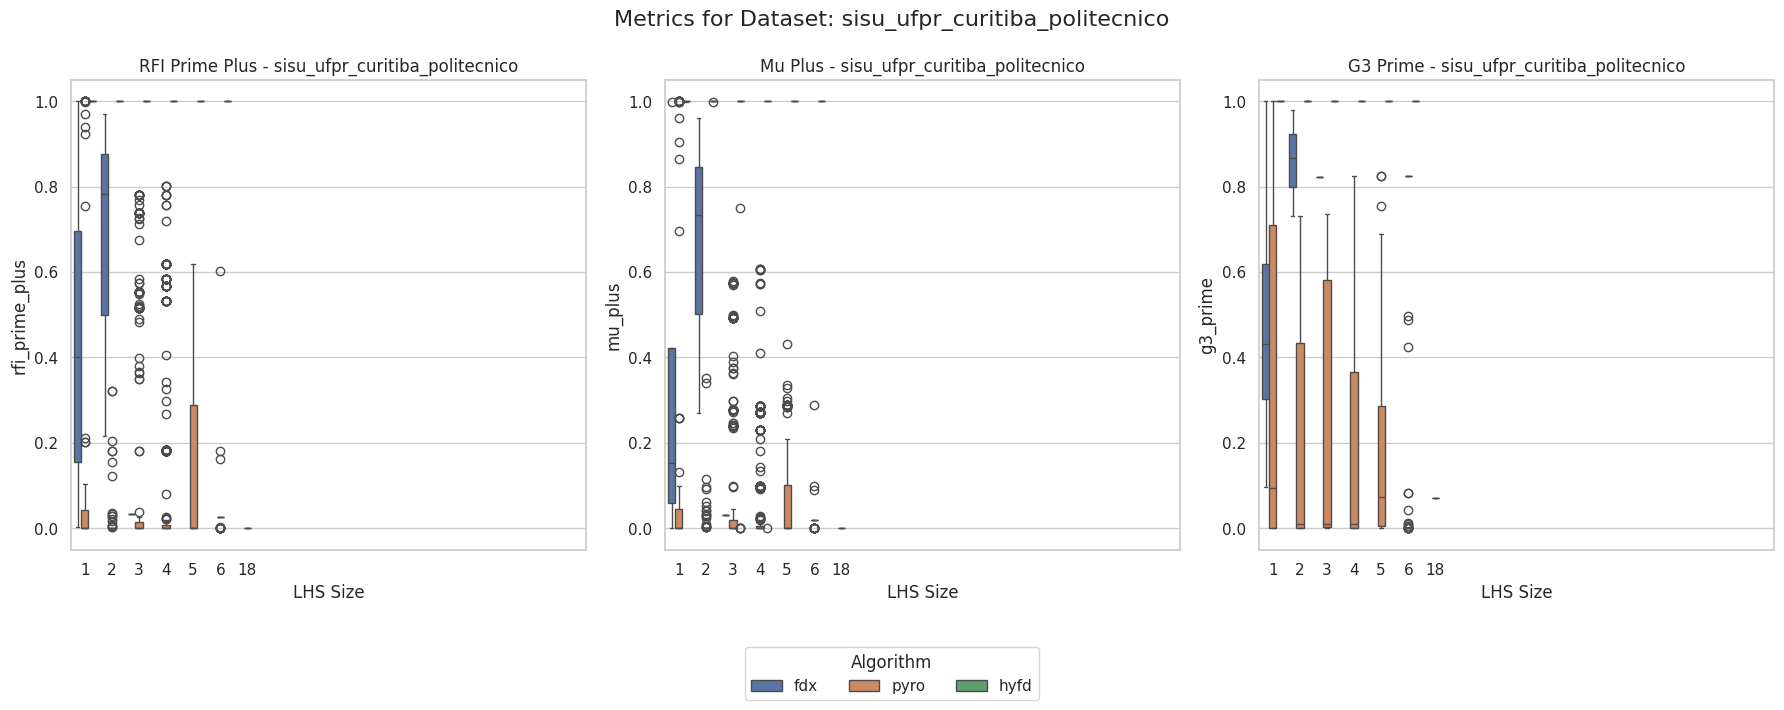

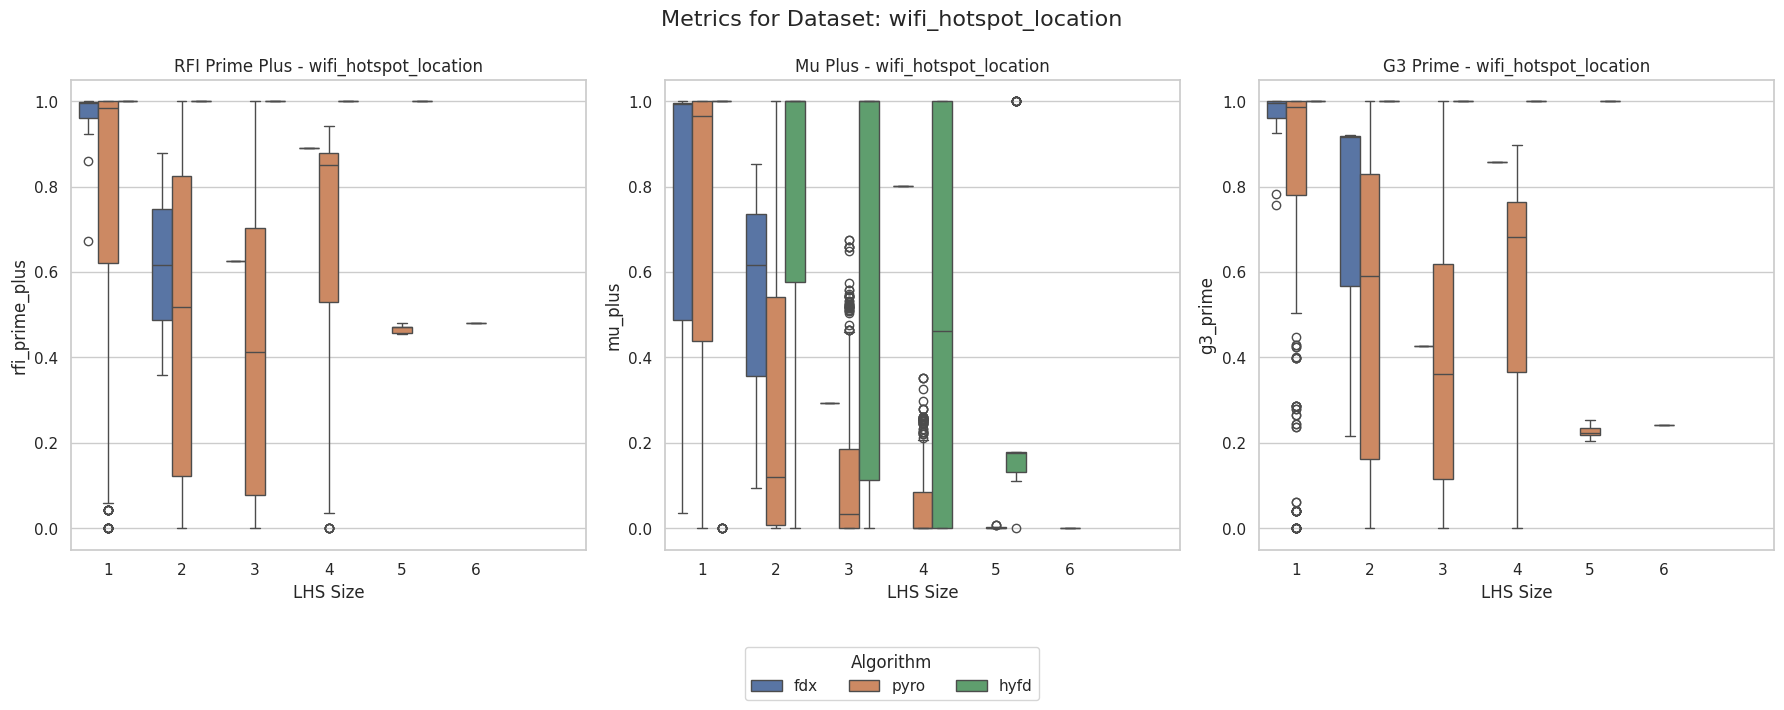

In [6]:
# Get unique datasets
datasets = global_df['dataset'].unique()

# Create a figure for each dataset
for dataset in datasets:
    # Filter data for this dataset
    dataset_df = global_df[global_df['dataset'] == dataset]
    
    # Create a figure with 3 subplots side by side
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
    
    # Plot for rfi_prime_plus
    sns.boxplot(
        data=dataset_df,
        x='lhs_size',
        y="rfi_prime_plus",
        hue='algorithm',
        ax=axes[0]
    )
    axes[0].set_title(f'RFI Prime Plus - {dataset}')
    axes[0].set_xlabel('LHS Size')
    axes[0].set_ylabel('rfi_prime_plus')
    
    # Plot for mu_plus
    sns.boxplot(
        data=dataset_df,
        x='lhs_size',
        y="mu_plus",
        hue='algorithm',
        ax=axes[1]
    )
    axes[1].set_title(f'Mu Plus - {dataset}')
    axes[1].set_xlabel('LHS Size')
    axes[1].set_ylabel('mu_plus')
    
    # Plot for g3_prime
    sns.boxplot(
        data=dataset_df,
        x='lhs_size',
        y="g3_prime",
        hue='algorithm',
        ax=axes[2]
    )
    axes[2].set_title(f'G3 Prime - {dataset}')
    axes[2].set_xlabel('LHS Size')
    axes[2].set_ylabel('g3_prime')

    # Set the same max value for lhs_size across all subplots
    max_lhs = dataset_df['lhs_size'].max()
    for ax in axes:
        ax.set_xlim(-0.5, max_lhs + 0.5)  # Add a small buffer on each side
        # Ensure x-ticks are integers representing lhs_size values
        ax.set_xticks(range(int(max_lhs) + 1))
    
    # Only keep one legend
    handles, labels = axes[0].get_legend_handles_labels()
    for ax in axes:
        ax.get_legend().remove()
    fig.legend(handles, labels, title='Algorithm', loc='upper center', bbox_to_anchor=(0.5, 0), ncol=len(labels))
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15)  # Make room for the legend at the bottom
    plt.suptitle(f'Metrics for Dataset: {dataset}', fontsize=16, y=1.05)
    plt.show()
